In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
image=cv2.imread('/content/DoodleBot.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Color masking

In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_purple = np.array([120, 40, 40])
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv, lower_purple, upper_purple)
masked = cv2.bitwise_and(image, image, mask=mask)

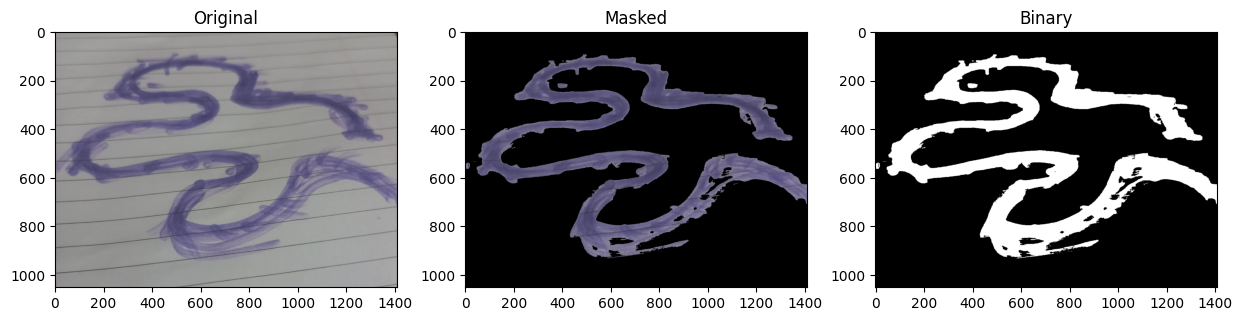

In [5]:
gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image_rgb), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)), plt.title("Masked")
plt.subplot(1, 3, 3), plt.imshow(binary, cmap='gray'), plt.title("Binary")
plt.show()

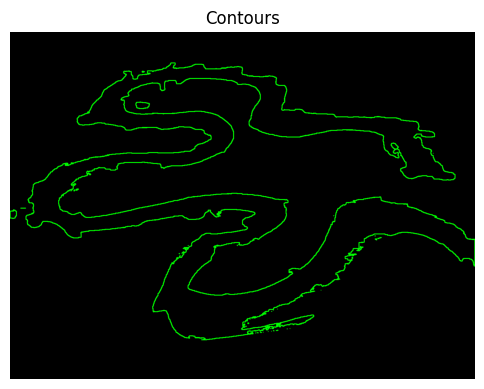

In [45]:
binary_uint8 = (binary * 255).astype(np.uint8) if binary.max() <= 1 else binary

contours, _ = cv2.findContours(binary_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_canvas = np.zeros_like(image_rgb)
cv2.drawContours(contour_canvas, contours, -1, (0, 255, 0), thickness=2)

plt.figure(figsize=(6, 6))
plt.imshow(contour_canvas), plt.title("Contours")
plt.axis('off')
plt.show()


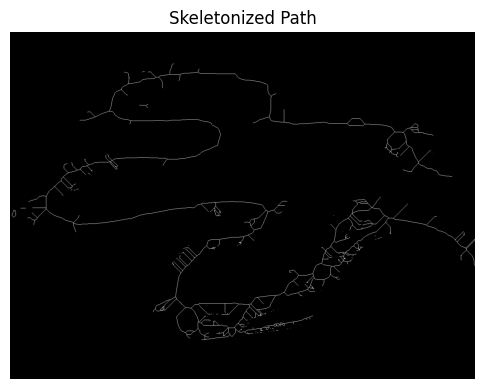

In [46]:
from skimage.morphology import skeletonize
from skimage.util import invert


binary_bool = binary_uint8 > 0


skeleton = skeletonize(binary_bool)


skeleton_uint8 = (skeleton * 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(skeleton_uint8, cmap='gray')
plt.title("Skeletonized Path")
plt.axis('off')
plt.show()


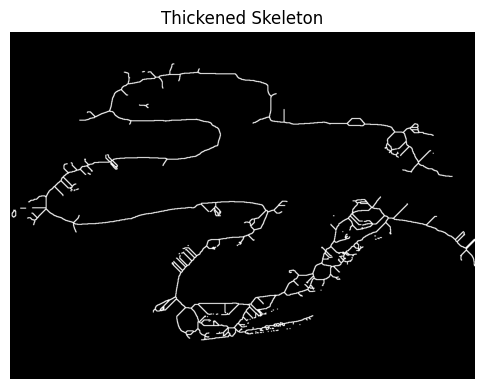

In [47]:



kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


skeleton_thick = cv2.dilate(skeleton_uint8, kernel, iterations=1)


plt.figure(figsize=(6, 6))
plt.imshow(skeleton_thick, cmap='gray')
plt.title("Thickened Skeleton")
plt.axis('off')
plt.show()


In [48]:

skeleton_bin = (skeleton_thick > 0).astype(np.uint8)


coords = np.column_stack(np.where(skeleton_bin > 0))  # (row, col) = (y, x)


points = [(int(x), int(y)) for y, x in coords]  # Reorder for proper axes


In [40]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(points, columns=["x", "y"])

# Save as CSV
df.to_csv("path_data.csv", index=False)

print("✅ Saved to path_data.csv")


✅ Saved to path_data.csv


In [42]:
!pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


In [43]:
from svgwrite import Drawing

# Create SVG canvas
svg_size = (skeleton_bin.shape[1], skeleton_bin.shape[0])  # width, height
dwg = Drawing("path_data.svg", size=svg_size)

# Optional: group all points into a polyline
dwg.add(dwg.polyline(points, stroke="black", fill="none", stroke_width=1))

# Save SVG
dwg.save()

print("✅ Saved to path_data.svg")


✅ Saved to path_data.svg
